<a href="https://colab.research.google.com/github/liamrogers03/COMP90054/blob/main/solution_set_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# COMP90054 AI Planning for Autonomy
### Problem Set 02 - Heuristic Search - solution




### Key concepts:
- Heuristic Functions and their properties and relations
- Heuristic search algorithms
- State-space model and size of the problem


### Set up the environment:
- Please run the following blocks of code to initialise the *environment*

In [1]:
!pip install pydotplus

In [2]:
import numpy as np
import pydotplus
from IPython.display import display, Image
from ipywidgets import interact
import heapq

In [3]:
# Class of the problem

class Problem():
  initial_state = None
  state_space = None
  goal_states = None
  actions = None
  transition_function = None
  costs = None

  def __init__(self, initial_state, state_space, goal_states, actions, transition_function, costs):
    self.initial_state = initial_state
    self.state_space = state_space
    self.goal_states = goal_states
    self.actions = actions
    self.transition_function = transition_function
    self.costs = costs

    self.current_state = self.initial_state

    return

class PriorityQueue:
    """
      Implements a priority queue data structure. Each inserted item
      has a priority associated with it and the client is usually interested
      in quick retrieval of the lowest-priority item in the queue. This
      data structure allows O(1) access to the lowest-priority item.
    """
    def  __init__(self):
        self.heap = []
        self.count = 0

    def push(self, item, priority):
        entry = (priority, self.count, item)
        heapq.heappush(self.heap, entry)
        self.count += 1

    def pop(self):
        (_, _, item) = heapq.heappop(self.heap)
        return item

    def isEmpty(self):
        return len(self.heap) == 0

    def update(self, item, priority):
        # If item already in priority queue with higher priority, update its priority and rebuild the heap.
        # If item already in priority queue with equal or lower priority, do nothing.
        # If item not in priority queue, do the same thing as self.push.
        for index, (p, c, i) in enumerate(self.heap):
            if i == item:
                if p <= priority:
                    break
                del self.heap[index]
                self.heap.append((priority, c, item))
                heapq.heapify(self.heap)
                break
        else:
            self.push(item, priority)

# Helper function to visualize the problem (i.e. draw state transition graph)
def generate_state_graph(problem,heuristics):
  state_graph={}
  state_graph['nodes'] = {k:{'label':'\"{}\n{}\"'.format(k,heuristics[k])} for k in sorted(list(problem.state_space))}
  state_graph['nodes'][problem.initial_state]['color'] = 'green'
  for goal in problem.goal_states:
      state_graph['nodes'][goal]['shape'] = 'doublecircle'
  state_graph['edge'] = {k:{'label':str(problem.costs[k])} for k in problem.costs.keys()}
  return state_graph

def render_graph(param):
  s = ''
  s += 'digraph G { \n'

  for node,tdict in param['nodes'].items():
    tstr = node + ' '
    if bool(tdict):
      tstr += '['
      for k,v in tdict.items():
        tstr += '{}={},'.format(k,v)
      tstr = tstr[:-1] + ']'
    tstr += ';\n'
    s+=tstr

  for edge,tdict in param['edge'].items():
    tstr = edge[0] + '->' + edge[1] + ' '
    if bool(tdict):
      tstr += '['
      for k,v in tdict.items():
        tstr += '{}={},'.format(k,v)
      tstr = tstr[:-1] + ']'
    tstr += ';\n'
    s+=tstr
  s += ' \n}'

  #print (s)
  graph = pydotplus.graph_from_dot_data(s)
  return graph.create_png()


# Visualize the search process (not required)
def visualize_heuristic_search_process(nodes,problem):
    progress = []

    for i,(state,fn,value,parent) in enumerate(nodes):
        param = {}
        param['nodes'] = {str(k):{'label':'\"n{}\n{},{},{},{}\"'.format(k,state,fn,cost,parent)} for k,(state,fn,cost,parent) in enumerate(nodes[:i+1])}

        # The newly generated node is red while all other nodes are green
        for k in param['nodes']:
            param['nodes'][k]['color'] = 'green'
        param['nodes'][str(i)]['color'] = 'red'

        # Black edges
        param['edge'] = {(str(parent), str(k)): {'label': str(problem.costs[(nodes[parent][0], state)])} for k, (state,fn, cost, parent) in enumerate(nodes[:i+1]) if not parent is None}
        for edge in param['edge']:
            param['edge'][edge]['color'] = 'black'

        progress.append(param)

    prog_imgs = [render_graph(param) for param in progress]
    def show_img(idx):
        return display(Image(prog_imgs[idx]))
    interact(show_img,idx=(0,len(prog_imgs)-1,1))







---

### Review and recap:

Code to auto generate state space model:

In [7]:
# Code to auto-generate state space model

states = set(['s{}'.format(i) for i in range(1,8)])
ini_st = 's1'
goal_sts = set(['s7'])

costs = {
    ('s1','s2'):2,
    ('s1','s3'):2,
    ('s1','s4'):1,
    ('s2','s5'):2,
    ('s3','s7'):10,
    ('s4','s6'):1,
    ('s5','s7'):3,
    ('s6','s7'):4,
}


actions = {'s{}'.format(i): set() for i in range(1,8)}
for k1,k2 in costs.keys():
  actions[k1].add((k1,k2))

tranf = {(k[0],k):k[1] for k in costs.keys()}

prob = Problem(initial_state=ini_st, state_space=states, goal_states=goal_sts, actions=actions, transition_function=tranf, costs=costs)

print ('initial_state={}'.format(prob.initial_state))
print ('state_space={}'.format(prob.state_space))
print ('goal_states={}'.format(prob.goal_states))
print ('actions={}'.format(prob.actions))
print ('transition_function={}'.format(prob.transition_function))
print ('costs={}'.format(prob.costs))


initial_state=s1
state_space={'s5', 's7', 's2', 's4', 's6', 's3', 's1'}
goal_states={'s7'}
actions={'s1': {('s1', 's2'), ('s1', 's4'), ('s1', 's3')}, 's2': {('s2', 's5')}, 's3': {('s3', 's7')}, 's4': {('s4', 's6')}, 's5': {('s5', 's7')}, 's6': {('s6', 's7')}, 's7': set()}
transition_function={('s1', ('s1', 's2')): 's2', ('s1', ('s1', 's3')): 's3', ('s1', ('s1', 's4')): 's4', ('s2', ('s2', 's5')): 's5', ('s3', ('s3', 's7')): 's7', ('s4', ('s4', 's6')): 's6', ('s5', ('s5', 's7')): 's7', ('s6', ('s6', 's7')): 's7'}
costs={('s1', 's2'): 2, ('s1', 's3'): 2, ('s1', 's4'): 1, ('s2', 's5'): 2, ('s3', 's7'): 10, ('s4', 's6'): 1, ('s5', 's7'): 3, ('s6', 's7'): 4}


Define the state-space model for the problem:

In [8]:
initial_state = 's1'
state_space = {'s3', 's5', 's1', 's2', 's4', 's7', 's6'}
goal_states = {'s7'}
actions = {'s1': {('s1', 's3'), ('s1', 's2'), ('s1', 's4')}, 's2': {('s2', 's5')}, 's3': {('s3', 's7')}, 's4': {('s4', 's6')}, 's5': {('s5', 's7')}, 's6': {('s6', 's7')}, 's7': set()}
transition_function = {('s1', ('s1', 's2')): 's2', ('s1', ('s1', 's3')): 's3', ('s1', ('s1', 's4')): 's4', ('s2', ('s2', 's5')): 's5', ('s3', ('s3', 's7')): 's7', ('s4', ('s4', 's6')): 's6', ('s5', ('s5', 's7')): 's7', ('s6', ('s6', 's7')): 's7'}
costs = {('s1', 's2'): 2, ('s1', 's3'): 2, ('s1', 's4'): 1, ('s2', 's5'): 2, ('s3', 's7'): 10, ('s4', 's6'): 1, ('s5', 's7'): 3, ('s6', 's7'): 4}

problem = Problem(initial_state, state_space, goal_states, actions, transition_function, costs)

Define the heuristics for the problem:

In [9]:
heuristics_none = {'s1':' ','s2':' ','s3':' ','s4':' ','s5':' ','s6':' ','s7':' '}
heuristics1 = {'s1':'4','s2':'3','s3':'5','s4':'3','s5':'2','s6':'2','s7':'0'}
heuristics2 = {'s1':'6','s2':'5','s3':'10','s4':'5','s5':'3','s6':'4','s7':'0'}
heuristics3 = {'s1':'6','s2':'1','s3':'1','s4':'5','s5':'3','s6':'4','s7':'0'}

# You can play around with your customised heuristic function here:
heuristics_customised = {}



---


### Problem 1:


#### State transition graphs with heuristics:

| $h_1$   |    $h_2$   |   $h_3$ |
| --- | --- | --- |
|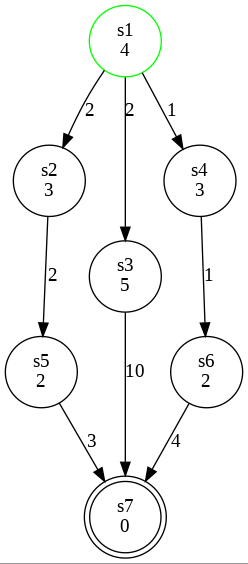|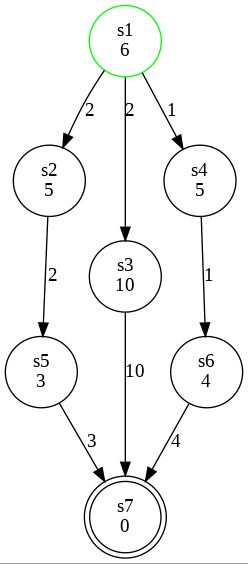|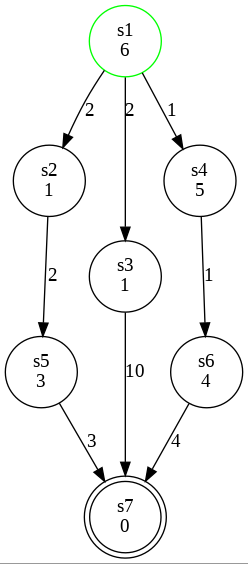|


#### Task 1:

##### Which Heuristics are admissible?

In [ ]:
#All of them

##### Which are consistent?

In [10]:
heuristic_list = {'h1':heuristics1,'h2':heuristics2,'h3':heuristics3}

# both h1 and h2
def check_consistency(problem,heuristic):
  for transition in problem.transition_function.items():
    state = transition[0][0]
    state1 = transition[1]
    if int(heuristic[state1])+problem.costs[(state,state1)]< int(heuristic[state]):
      print('Inconsistent due to transition {} to {}. {} + {} is not larger or equal to {}.'.format( state, state1, problem.costs[(state,state1)],int(heuristic[state1]),int(heuristic[state]) ))
      return False
  return True

for label, h in heuristic_list.items():
  print(f"{label}'s consistency:")
  print(check_consistency(problem,h))

h1's consistency:
True
h2's consistency:
True
h3's consistency:
Inconsistent due to transition s1 to s2. 2 + 1 is not larger or equal to 6.
False


##### Do any of the heuristics dominate any other?

In [11]:
checking_list = [(i,j) for i in heuristic_list.items() for j in heuristic_list.items() if i!=j]

def check_domination(h1,h2):
  dominant = True
  for state in problem.state_space:
    if not int(h1[1][state])>= int(h2[1][state]):
      # print(f'state is {state}, {h1[0]} h is {h1[1][state]} < {h2[0]} h is {h2[1][state]}')
      dominant = False
  return dominant

# since all heuristics are admissible, so we can simply check biggness relation
for h1,h2 in checking_list:
  print(f'{h1[0]} dominates {h2[0]} is: {check_domination(h1,h2)}')


h1 dominates h2 is: False
h1 dominates h3 is: False
h2 dominates h1 is: True
h2 dominates h3 is: True
h3 dominates h1 is: False
h3 dominates h2 is: False


#### Task 2:

##### Choose one of the heuristic functions to perform A* algorithm, and discuss the node expansion order:

In [12]:
#  Expansion node order
#  h2 as example
nodes = [ # (state, fn, accumulated cost, id of parent node)
            ('s1', 6, 0, None),
            ('s4', 6, 1, 0),
            ('s6', 6, 2, 1),
            ('s7', 6, 6, 2)
        ]

##### Choose one of the heuristic functions to perform the Greedy search algorithm, and discuss the node expansion order:

In [13]:
#  Expansion node order
#  h2 as example
nodes = [ # (state, fn, accumulated cost, id of parent node)
            ('s1', 6, 0, None),
            ('s4', 5, 1, 0),
            ('s6', 4, 2, 1),
            ('s7', 0, 6, 2)
        ]

##### Choose one of the heuristic functions to perform the WA* algorithm, and discuss the node expansion order:


In [14]:
#  Expansion node order
#  w=2 and h2 as example
nodes = [ # (state, fn, accumulated cost, id of parent node)
            ('s1', 12, 0, None),
            ('s4', 11, 1, 0),
            ('s6', 10, 2, 1),
            ('s7', 6, 6, 2)
        ]

##### Visualize your solution:



In [15]:
visualize_heuristic_search_process(nodes,problem)

interactive(children=(IntSlider(value=1, description='idx', max=3), Output()), _dom_classes=('widget-interact'…

##### Which path is returned as the solution? (using $h_2$ and A* as example)

s1 -> s4 -> s6 -> s7

##### Is this the optimal plan? Has the algorithm proved this? (using $h_2$ and A* as example)

Yes, since $n_6$ is at a goal state and has the lowest admissible cost
estimate of any node in the open list in iteration 4, all other paths
from any open node must be longer, given $h_2$ is both admissible and
consistent.

### Problem 2:


Consider an $m \times m$ **Manhattan Grid**, and a set of coordinates $G$ to visit in any order.

**Hint**: Consider a set of coordinates $V'$ remaining to be visited, or a set of coordinates $V$ already visited. What's the difference between them



##### Formulate a state-based search problem to find a tour of all the desired points (i.e. define a state space, applicable actions, transition and cost functions).

*    $S = \{ \langle x , y, V' \rangle \mid x, y \in \{0,\dots,m-1\} \, \land \, V' \subseteq G \}$

*    $s_0 = \langle (0,0),G \setminus \{(0,0)\}\rangle $

*    $S_G = \{ \langle (x,y),\{\} \rangle \mid x,y \in \{0,\dots,m-1\} \}$

*    $A(\langle x , y, V' \rangle) = \{ \left( dx , dy \right) \mid$
$ dx, dy \in \{-1, 0, 1\} \\$
$\land \ |dx| + |dy| = 1 \\$
$\land \ x + dx, y + dy \in \{0,\dots,m-1\} \} $


*    $T(\langle x , y, V' \rangle,\left(dx, dy\right)) = \langle x+dx , y+dy, V' \setminus \{(x+dx, y+dy)\} \rangle $

*    $c(a, s) = 1$




##### What is the branching factor of the search?

4

##### What is the size of the state space in terms of $m$ and $G$?

If using $V'$, then $m^2 \times 2^{|G|}$

If using $V$, then $m^2 \times 2^{|m \times m|}$

### Challenge Problem 1:

Review problem 1 task 2, instead of manual input the node expansion order, now you can try to implement those heuristic search algorithm on your own.

#### State transition graphs with heuristics:

| $h_1$   |    $h_2$   |   $h_3$ |
| --- | --- | --- |
|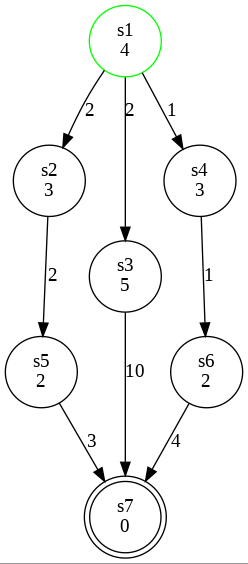|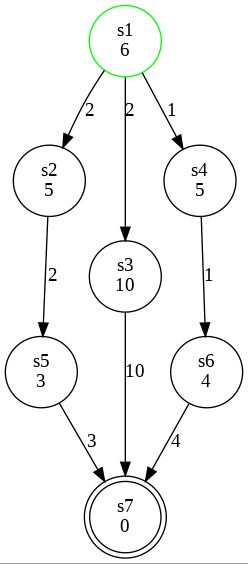|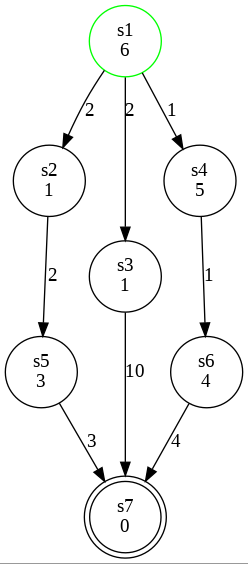|


#### Algorithm Implementation: A*

In [16]:
# Instead of returning the final solution, your function here should append each node when it gets expanded, and return the expanded list
def astar(problem, heuristic):
    expansion_order = []
    # Your code here:
    start_node = (problem.initial_state, int(heuristic[problem.initial_state]), 0, None)
    pq = PriorityQueue()
    pq.push(start_node,int(heuristic[problem.initial_state]))

    while not pq.isEmpty():
        current_node = pq.pop()
        expansion_order.append(current_node)
        state, fn, accu_cost, parent_node_id = current_node

        # Goal Check
        if state in problem.goal_states:
            return expansion_order

        # Add successor nodes into queue (no loop check; randomly tie-break)
        for action in problem.actions[state]:
            succ_state = problem.transition_function[(state, action)]
            cost = accu_cost + problem.costs[action]
            pq.push((succ_state, int(heuristic[succ_state])+cost ,cost, len(expansion_order)-1),int(heuristic[succ_state])+cost)

    return expansion_order

ns = astar(problem, heuristics2)

In [17]:
visualize_heuristic_search_process(ns,problem)

interactive(children=(IntSlider(value=1, description='idx', max=3), Output()), _dom_classes=('widget-interact'…

#### Algorithm Implementation: Greedy

In [18]:
# Instead of returning the final solution, your function here should append each node when it gets expanded, and return the expanded list
def greedy(problem, heuristic):
    expansion_order = []
    # Your code here:
    start_node = (problem.initial_state, int(heuristic[problem.initial_state]), 0, None)
    pq = PriorityQueue()
    pq.push(start_node,int(heuristic[problem.initial_state]))

    while not pq.isEmpty():
        current_node = pq.pop()
        expansion_order.append(current_node)
        state, fn, accu_cost, parent_node_id = current_node

        # Goal Check
        if state in problem.goal_states:
            return expansion_order

        # Add successor nodes into queue (no loop check; randomly tie-break)
        for action in problem.actions[state]:
            succ_state = problem.transition_function[(state, action)]
            cost = accu_cost + problem.costs[action]
            pq.push((succ_state, int(heuristic[succ_state]) ,cost, len(expansion_order)-1),int(heuristic[succ_state]))

    return expansion_order

ns = greedy(problem, heuristics2)

In [19]:
visualize_heuristic_search_process(ns,problem)

interactive(children=(IntSlider(value=1, description='idx', max=3), Output()), _dom_classes=('widget-interact'…

#### Algorithm Implementation: WA*

In [20]:
# Instead of returning the final solution, your function here should append each node when it gets expanded, and return the expanded list
def wastar(problem, heuristic,w):
    expansion_order = []
    # Your code here:
    start_node = (problem.initial_state, int(heuristic[problem.initial_state])*w+0, 0, None)
    pq = PriorityQueue()
    pq.push(start_node,int(heuristic[problem.initial_state])*w+0)

    while not pq.isEmpty():
        current_node = pq.pop()
        expansion_order.append(current_node)
        state, fn, accu_cost, parent_node_id = current_node

        # Goal Check
        if state in problem.goal_states:
            return expansion_order

        # Add successor nodes into queue (no loop check; randomly tie-break)
        for action in problem.actions[state]:
            succ_state = problem.transition_function[(state, action)]
            cost = accu_cost + problem.costs[action]
            pq.push((succ_state, int(heuristic[succ_state])*w+cost ,cost, len(expansion_order)-1),int(heuristic[succ_state])*w+cost)

    return expansion_order

ns = wastar(problem, heuristics2,2)

In [21]:
visualize_heuristic_search_process(ns,problem)

interactive(children=(IntSlider(value=1, description='idx', max=3), Output()), _dom_classes=('widget-interact'…